# Ultra Diffuse Galaxies Data Analysis

### Imports

In [1]:
%matplotlib widget
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
from tqdm import tqdm
from IPython.display import clear_output

from cube_cut import cut_cube
from run_barycentric import barycentric_correction
from spectra_stacker_gen2 import spectra_stack
from ppxf_kinematics import ppxf_kinematics

warnings.filterwarnings('ignore')

### step 1: clean spectra

['/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/kb201213_00084_ocubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/kb201213_00085_ocubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/kb201213_00086_ocubes.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/kb201213_00087_ocubes.fits']
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/kb201213_00084_ocubes.fits 4767.25
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/kb201213_00085_ocubes.fits 4767.25
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/kb201213_00086_ocubes.fits 4767.25
/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/kb201213_00087_ocubes.fits 4767.25
209

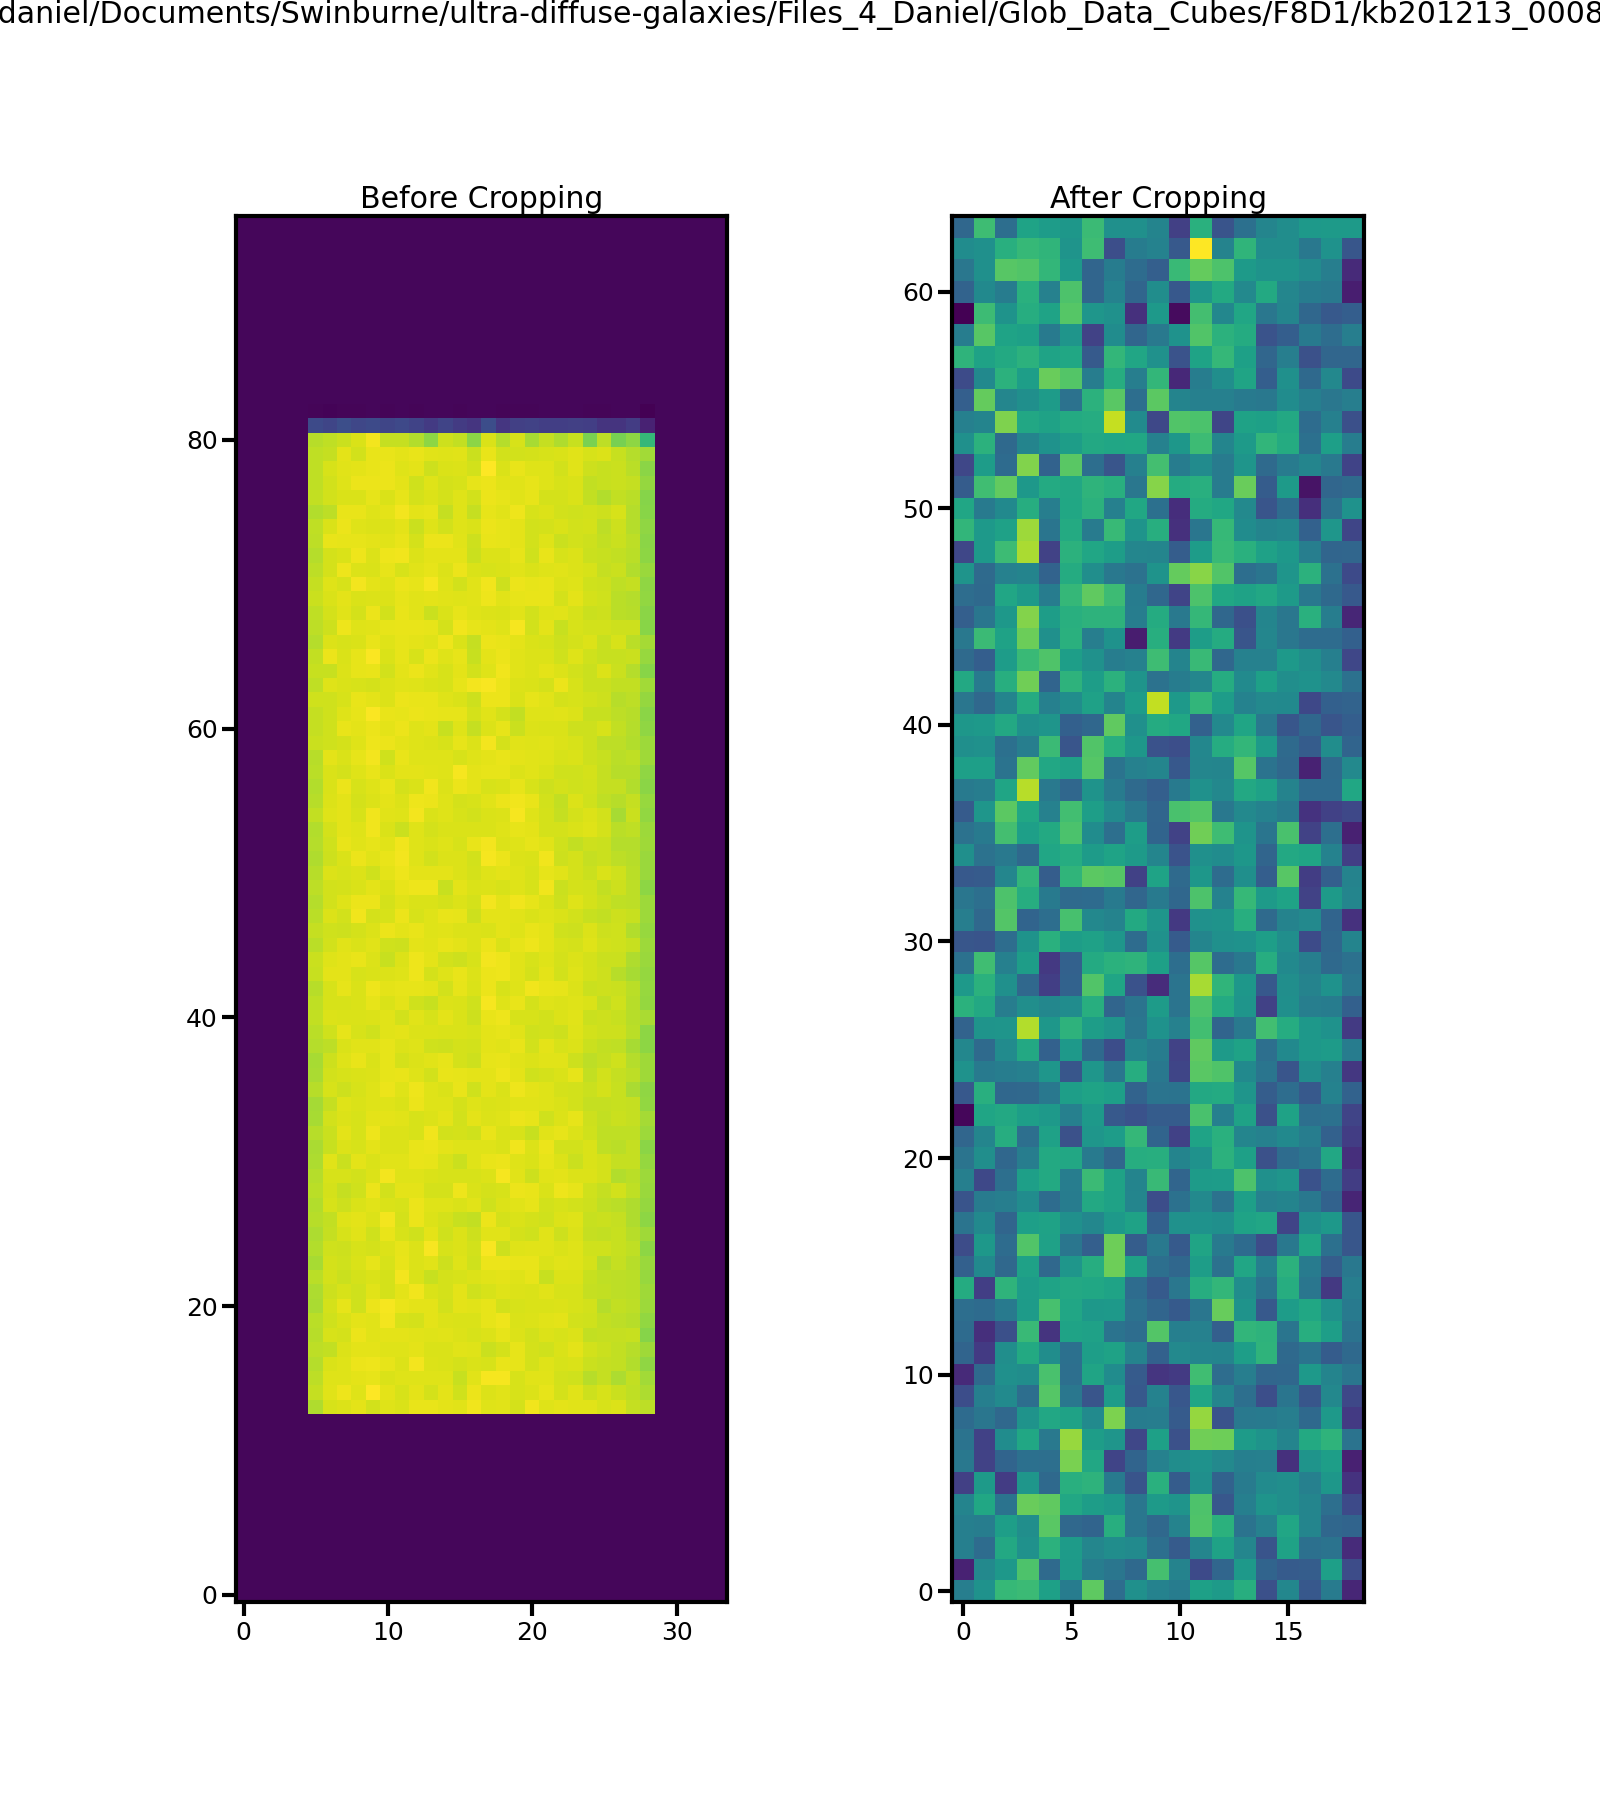

Files Written out


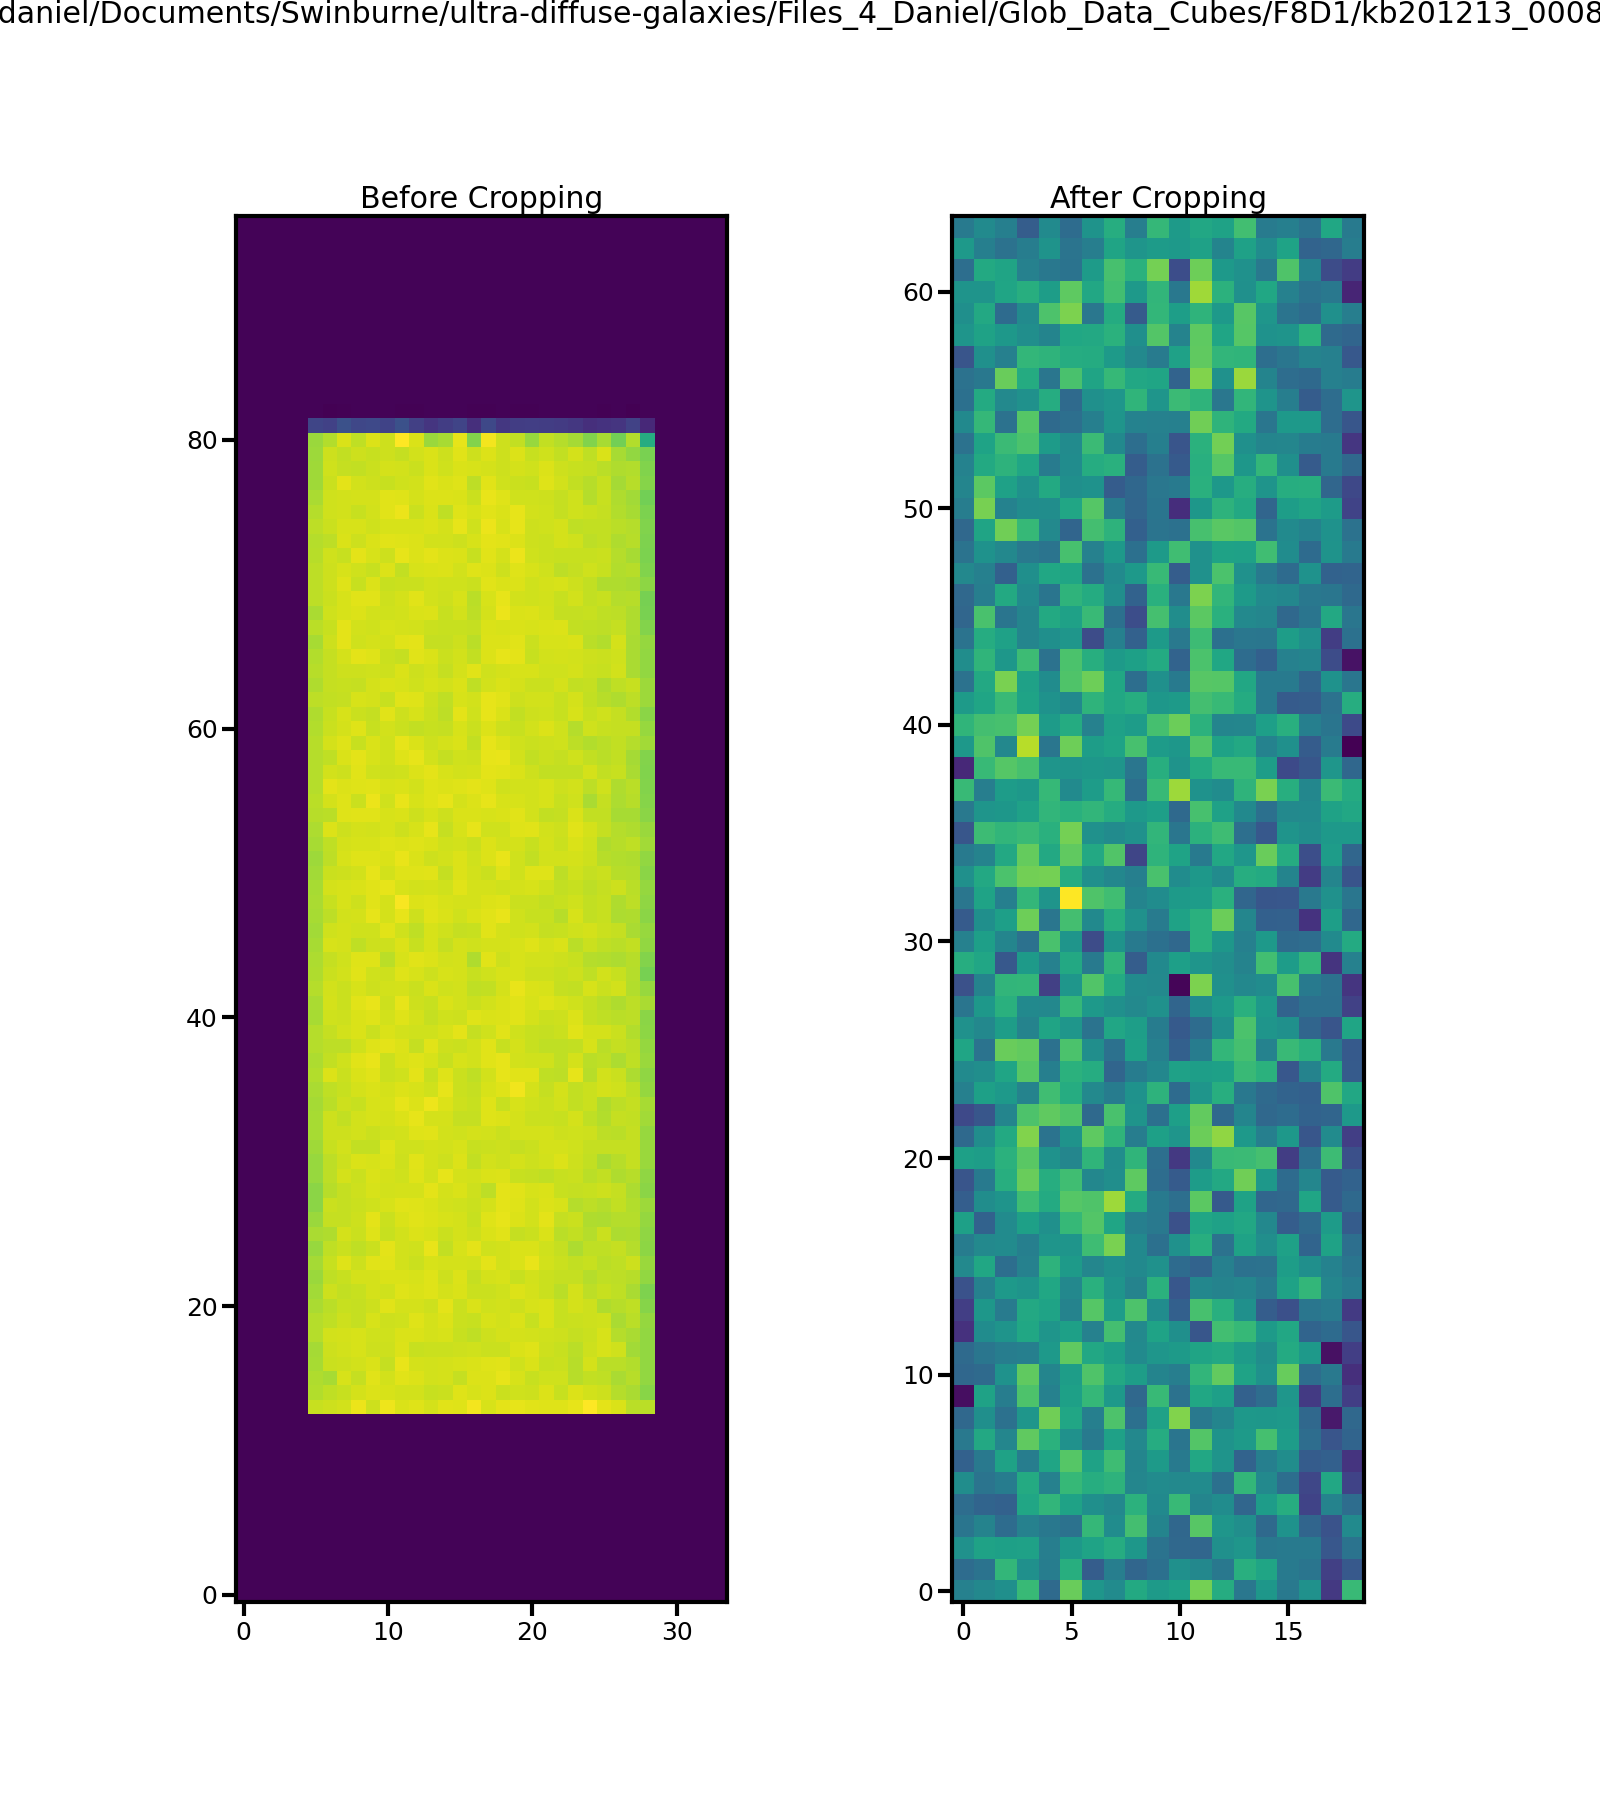

Files Written out


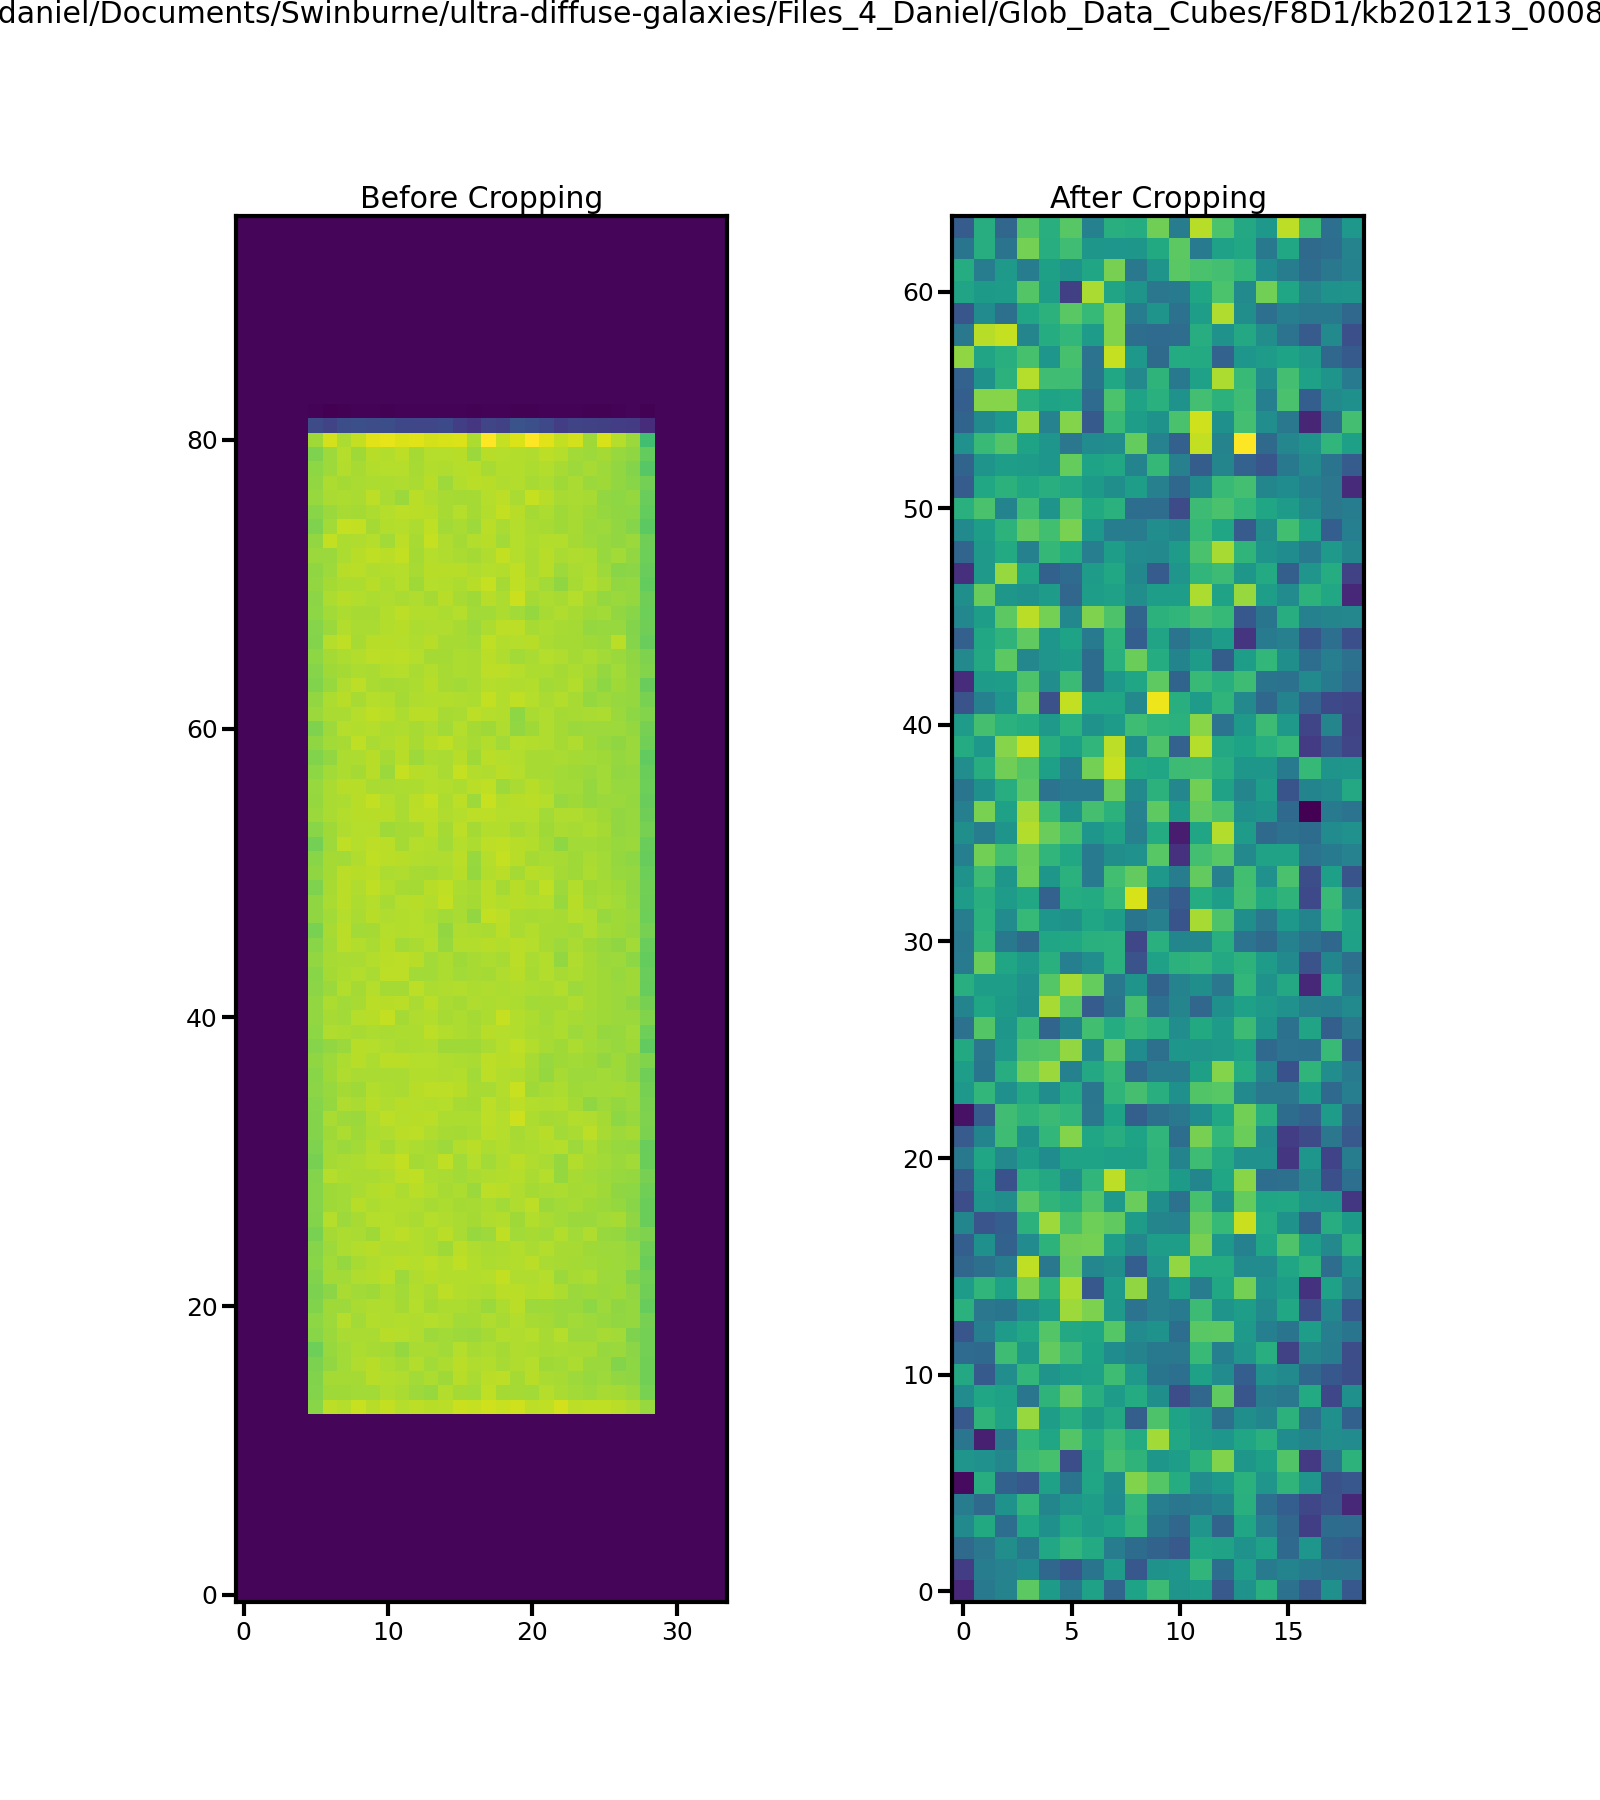

Files Written out


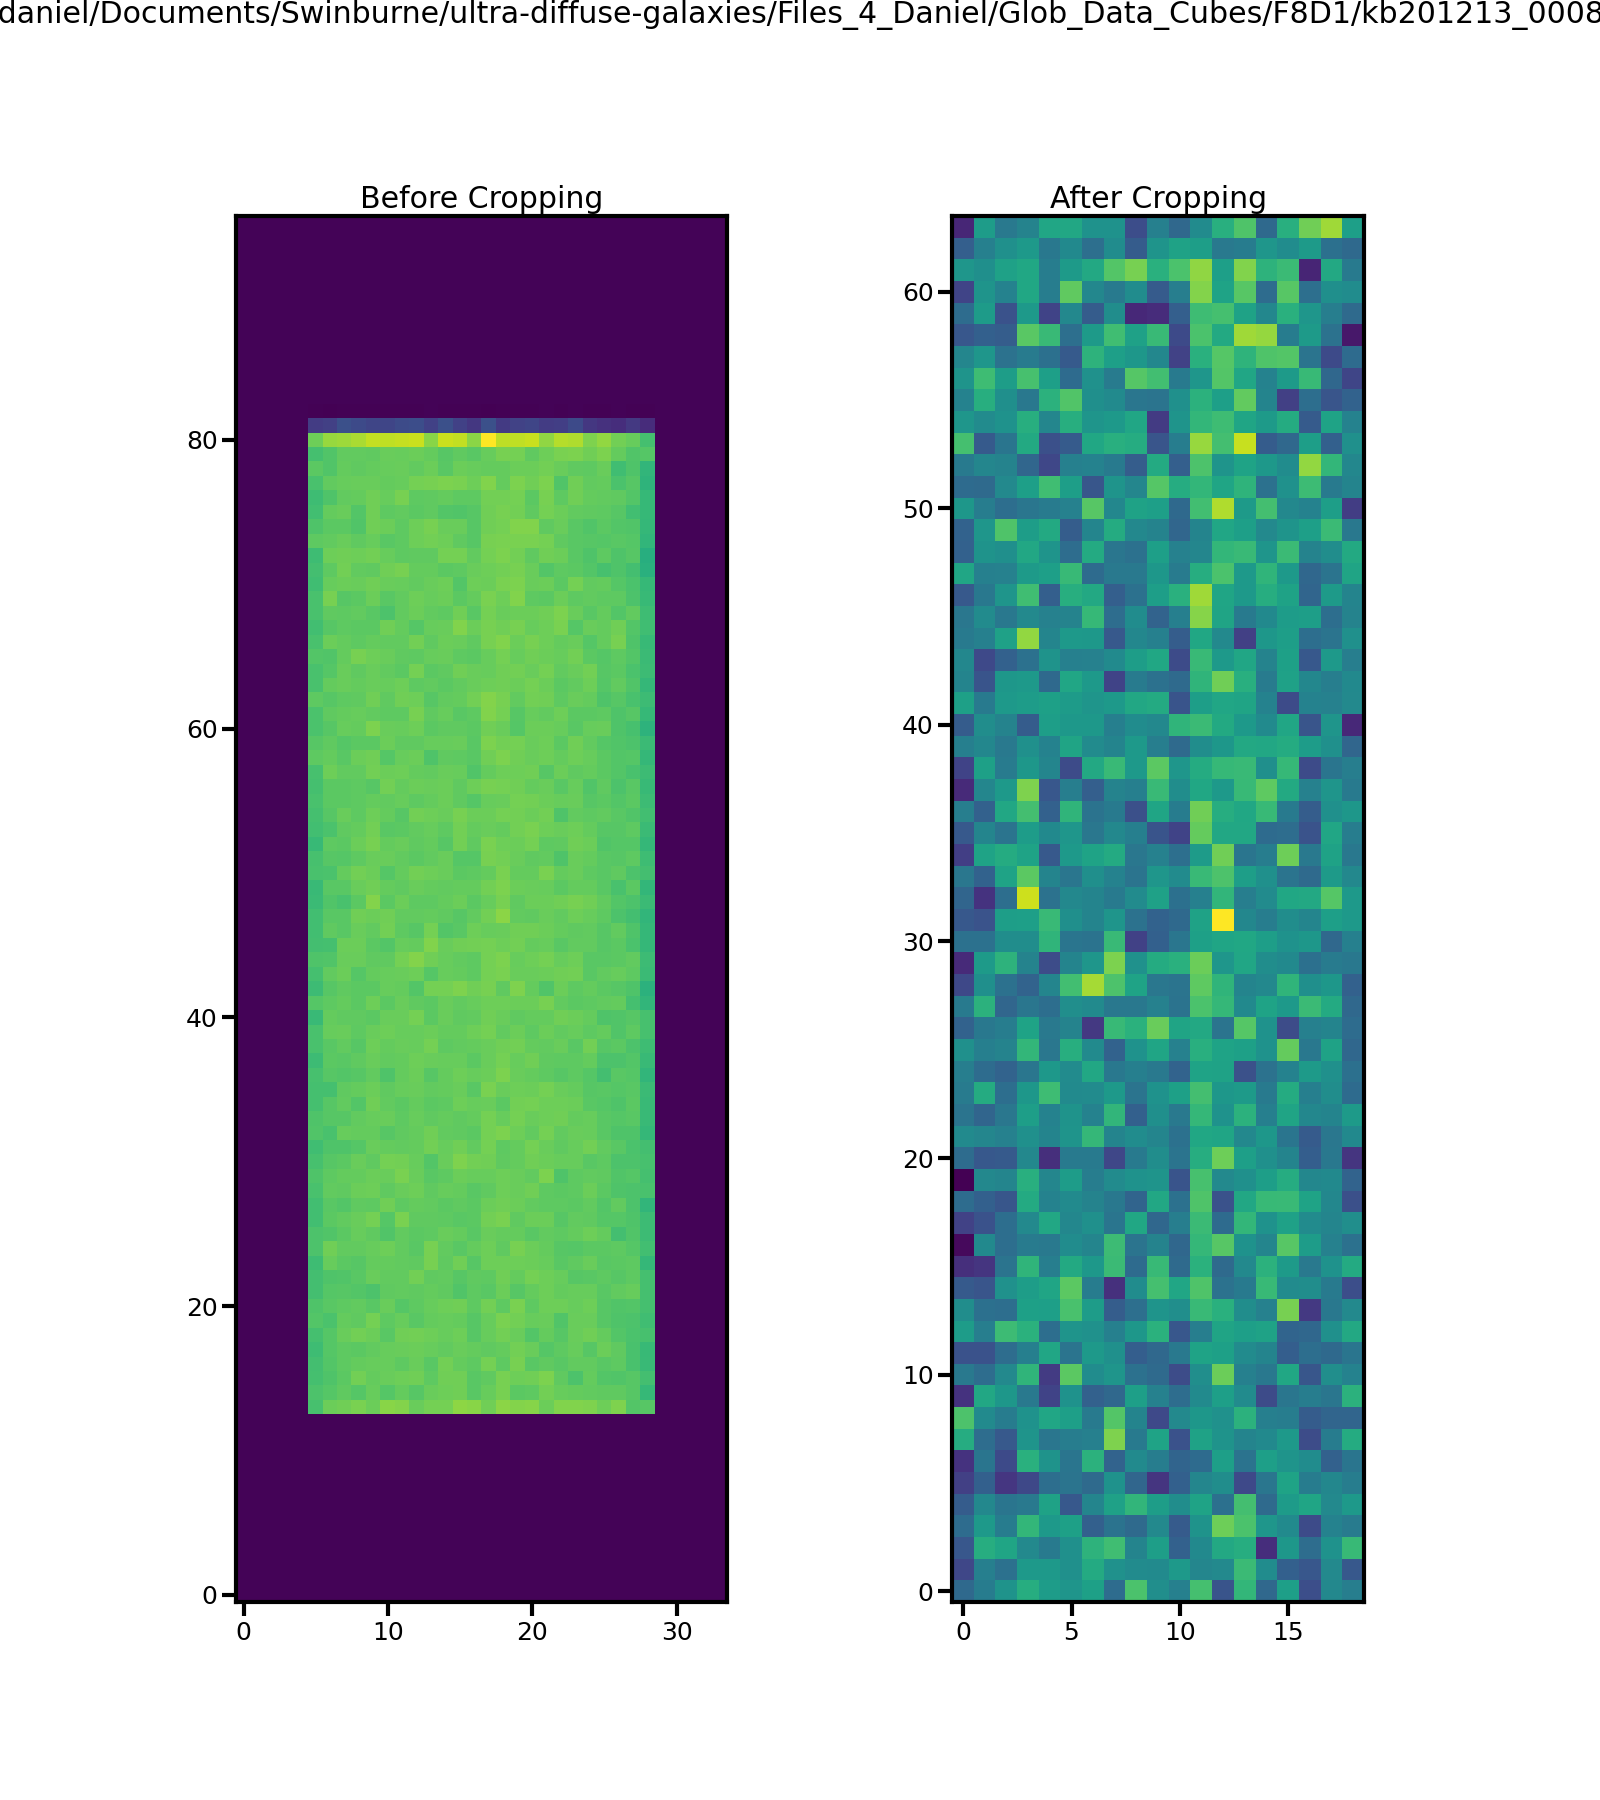

Files Written out
Code Competed Successfully in, 7.00 seconds


In [3]:
""" User inputs """
s1_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/Files_4_Daniel/Glob_Data_Cubes/F8D1/F8D1/GC' # path to directory containing spectra
s1_file_keyword = '*kb*ocubes*' # keyword to find files in directory
x_low = 7 # lowest and highest xvalue of the spaxel to be INCLUDED in the rectangle
x_high = 25
y_low = 17 # lowest and highest yvalue of the spaxel to be INCLUDED in the rectangle
y_high = 80

cut_cube(s1_file_directory, s1_file_keyword, x_low, x_high, y_low, y_high)

### step 1.5: extract spectra
open qfitsview and create `.fits` file for all objects in the cut files 

### step 2: barycentric correction

In [2]:
""" User inputs """
s2_file_directory = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/Globs/NGC_247/GCs/obj2/' # path to directory containing spectra
s2_file_keyword = '[0-9]*.fits' # keyword to find files in directory
corrections = 'manual' # 'manual' or 'automatic'

if corrections == 'manual':
    bary_corr = np.array([0,0,0]) # Manual barycentric correction in km/s. One number for each file!
    # INPUT MANUAL ABOVE ^^^^^^
else:
    bary_corr = barycentric_correction(s2_file_directory, s2_file_keyword)
    bary_corr = np.array(bary_corr)
    if np.all(bary_corr > 0):
        bary_corr = -bary_corr
        print('ensured bary_corr is negative')
    
print(f'Barycentric correction: {bary_corr} km/s')
print(f'Correction Deltas: {np.diff(bary_corr)} km/s')
plt.close()

Barycentric correction: [0 0 0] km/s
Correction Deltas: [0 0] km/s


### step 3: spectra stacking
must run for all objects

list of files: ['/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/Globs/NGC_247/GCs/obj2/50.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/Globs/NGC_247/GCs/obj2/51.fits', '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/Globs/NGC_247/GCs/obj2/52.fits']
[3632. 3633. 3634. ... 5622. 5623. 5624.]


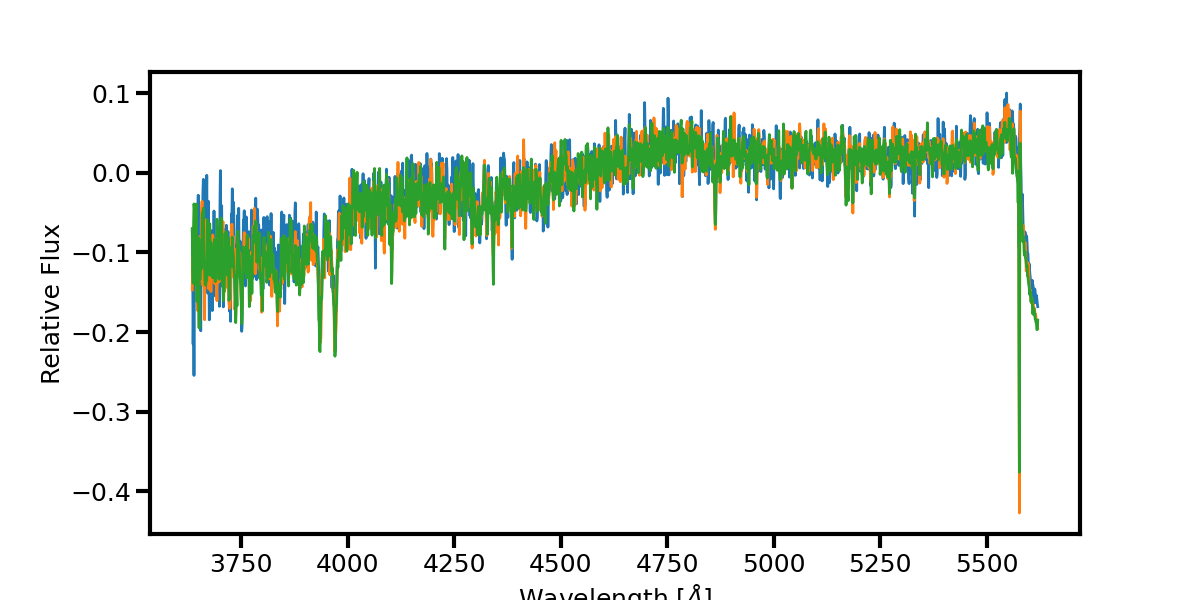

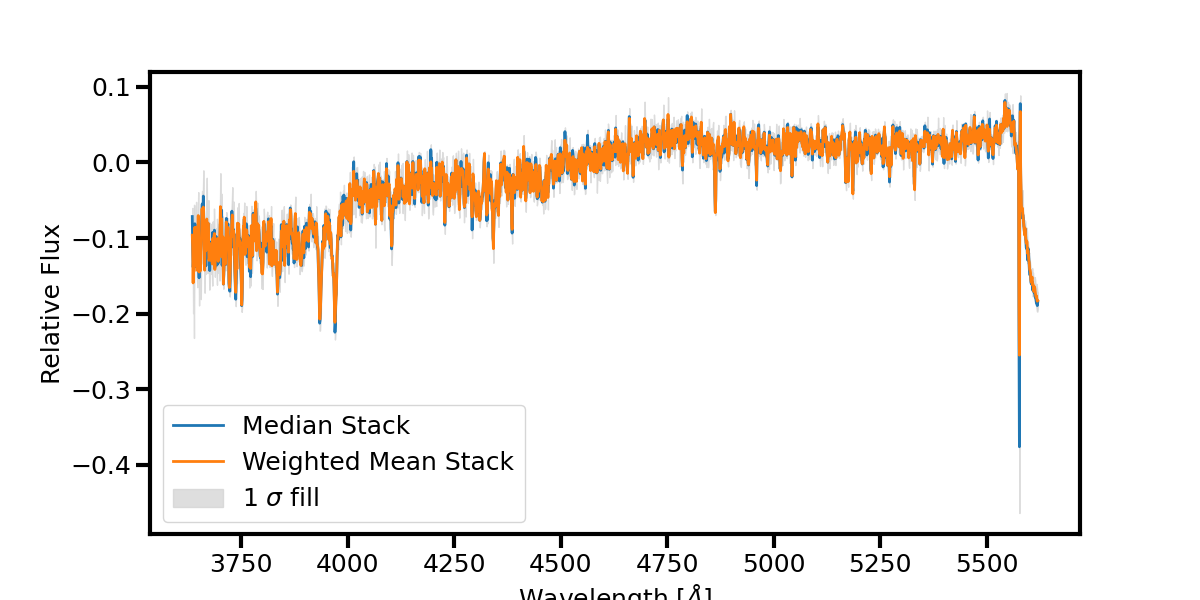

OSError: File '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/Globs/NGC_247/GCs/obj2/mean.fits' already exists.

In [3]:
""" User inputs """
overwrite = False # if True, will overwrite any existing files. Proceed with caution, probably best to set False

plt.close('all')
spectra_stack(s2_file_directory, s2_file_keyword, bary_corr, overwrite)
# plot 1: spectra
# plot 2: stack
plt.close()

### step 4.1: Check ppxf velocities of degrees

In [4]:
""" User inputs """
ppxf_file = '/home/daniel/Documents/Swinburne/ultra-diffuse-galaxies/results/Globs/NGC_247/GCs/obj2/mean_NCS.fits' # path to ppxf input file
fwhm_gal = 4550 / 1800 # instrument resolution
# min_degrees, max_degrees = 1, 30 # min and max degrees for Legendre polynomials
wavcut = 1700 # cut the spectra at this index. -1 to not cut

# degrees = np.arange(min_degrees, max_degrees+1) # make a list of numbers to test for degree
# velocities = []
# for deg in tqdm(degrees):
#     vel, sigma, h3, h4 = ppxf_kinematics(ppxf_file, fwhm_gal, deg)
#     clear_output(wait=True)
#     velocities.append(vel)
# plt.close()

# plt.figure(figsize=(10, 5))
# plt.scatter(degrees, velocities)
# plt.xlabel("Polynomial Degree")
# plt.ylabel("Radial Velocity [km/s]")
# plt.xticks(np.arange(min(degrees), max(degrees)+1, 1.0))
# plt.show()

### step 4.2 ppxf with best degree

AttributeError: module 'ppxf.ppxf_util' has no attribute 'varsmooth'

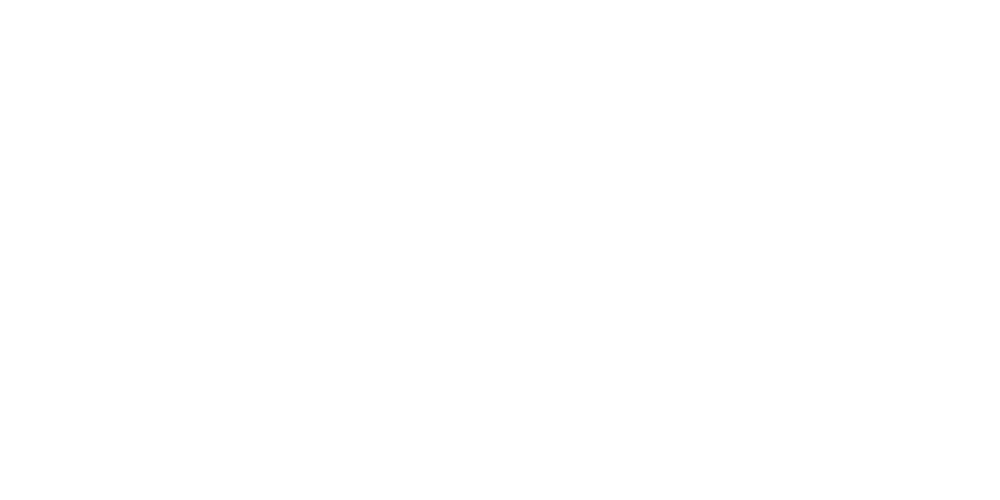

In [5]:
""" User inputs """
degree = 6 # degree of Legendre polynomial to use

plt.close()
plt.figure(figsize=(10,5))
ppxf_kinematics(ppxf_file, fwhm_gal, degree, wavcut, fit='all')
# plt.savefig(os.path.dirname(ppxf_file) + '/fit.png')